# Table Creation Scripts

In [28]:
import sqlite3 as lite
import sys

In [29]:
%%capture
%load_ext sql

address = '127.0.0.1'
user = 'myadmin'
database = 'csciAppDev.db'

%sql sqlite:///$database

u'Connected: None@csciAppDev.db'

In [43]:
%%time
%%sql
--Development User Table
DROP TABLE IF EXISTS users;
CREATE TABLE users (id INTEGER PRIMARY KEY AUTOINCREMENT, 
                      title TEXT, 
                      description TEXT, 
                      done INTEGER);

Done.
Done.
CPU times: user 3.03 ms, sys: 1.93 ms, total: 4.96 ms
Wall time: 5.28 ms


[]

In [22]:
%sql SELECT name, rootpage, sql FROM sqlite_master WHERE type='table';

Done.


name,rootpage,sql
sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
users,2,"CREATE TABLE users (id INTEGER PRIMARY KEY AUTOINCREMENT, title TEXT, description TEXT, done INTEGER)"


In [23]:
%%sql 
INSERT INTO users (title, description, done)
VALUES ('dbBuy groceries', 'Milk, Cheese, Pizza, Fruit, Tylenol', 0 ),
       ('dbLearn Python', 'Need to find a good Python tutorial on the web', 0 );

2 rows affected.


[]

In [42]:
%sql select * from users

Done.


id,title,description,done
1,test,description,0
2,test1,description,0
3,test1,description,0


# Analyze accelerometer data for frequency

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.fftpack
import matplotlib.pyplot as plt

In [53]:
### load dataset #x = load('filename.txt');
datafile = "accel_data.txt" # sample data
COLUMN_NAMES = ["x","y","z","t"]
df = pd.read_table(datafile, names=COLUMN_NAMES, header=None)

In [54]:
df.head()

,x,y,z,t
0,0.000000,0.000000,0.000000,0
1,-2.360084,2.965219,8.805275,214
2,-2.334945,2.749741,8.561067,151
3,-2.308609,2.903568,8.902839,179
4,-1.669357,2.478597,8.810662,187


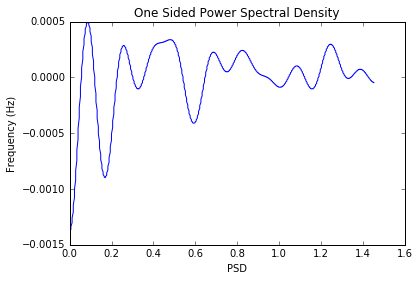

In [52]:
fs = 1000.0/df["t"].mean()
x = np.array(df["x"])

NFFT=1024  #NFFT=1024;
L = len(x) #L=length(x);

X = scipy.fftpack.fft(x,NFFT); #X=fft(x,NFFT);
Px = X.conj(X)/(NFFT*L) #Px=X.*conj(X)/(NFFT*L); %Power of each freq components

fVals = fs*(np.array(range(0,NFFT/2))/2)/NFFT#fVals=fs*(0:NFFT/2-1)/NFFT;

fig, ax = plt.subplots() #figure
ax.plot(fVals,Px[0:NFFT/2])
plt.ylabel('Frequency (Hz)')
plt.xlabel('PSD')
plt.title('One Sided Power Spectral Density')
plt.show()